In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
#########################################################

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

MCC_scorer = make_scorer(matthews_corrcoef)
#######################################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [6]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1['DIAGN'] = data1['DIAGN'].replace({2: 1})
data1['DIAGN'] = data1['DIAGN'].replace({3: 1})
data1['DIAGN'] = data1['DIAGN'].replace({4: 1})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    303
1    168
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
567,Case 248,2,20230418104244.jpg,PruebasCITOBOT_Anon/Case 248/,0
568,Case 249,2,20230418103711.jpg,PruebasCITOBOT_Anon/Case 249/,1
569,Case 249,2,20230418103638.jpg,PruebasCITOBOT_Anon/Case 249/,1
570,Case 250,2,20230418093117.jpg,PruebasCITOBOT_Anon/Case 250/,0


In [7]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({2: 1})
data2['DIAGN'] = data2['DIAGN'].replace({3: 1})
print(data2['DIAGN'].value_counts())
data2

1    597
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,1
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,1


In [8]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
dataC1 = data3[data3['DIAGN'] == 0]
dataC2 = data3[data3['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=531)
data_aleatoria2 = dataC2.sample(n=58)
data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1     58
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
213,P461830,2,I622171.jpg,training_SEG/Biopsy_Study/,0
55596,P514706,6,I543749_C2.jpg,training_SEG/NHS/,0
56329,P528792,8,I610008_C2.jpg,training_SEG/NHS/,0
67000,P725901,4,I584615_C1.jpg,training_SEG/NHS/,0
55599,P514706,7,I866417_C1.jpg,training_SEG/NHS/,0
...,...,...,...,...,...
359,P735417,3,I493953.jpg,training_SEG/Biopsy_Study/,1
247,P543242,6,I266055.jpg,training_SEG/Biopsy_Study/,1
419,P825311,2,I692790.jpg,training_SEG/Biopsy_Study/,1
348,P707535,4,I493262.jpg,training_SEG/Biopsy_Study/,1


In [9]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC1 = data4[data4['DIAGN'] == 0]
dataC2 = data4[data4['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=244)
data_aleatoria2 = dataC2.sample(n=244)
data4 = pd.concat([data_aleatoria, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

0    244
1    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
164,0,0,57.jpg,Kaggle_SEG/Type_1/,0
130,0,0,41.jpg,Kaggle_SEG/Type_1/,0
183,0,0,683.jpg,Kaggle_SEG/Type_1/,0
170,0,0,593.jpg,Kaggle_SEG/Type_1/,0
67,0,0,1370.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
261,0,0,1032.jpg,Kaggle_SEG/Type_2/,1
254,0,0,1017.jpg,Kaggle_SEG/Type_2/,1
630,0,0,326.jpg,Kaggle_SEG/Type_2/,1
1325,0,0,604.jpg,Kaggle_SEG/Type_3/,1


In [10]:
data = pd.concat([data2, data3])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
359,P735417,3,I493953.jpg,training_SEG/Biopsy_Study/,1
247,P543242,6,I266055.jpg,training_SEG/Biopsy_Study/,1
419,P825311,2,I692790.jpg,training_SEG/Biopsy_Study/,1
348,P707535,4,I493262.jpg,training_SEG/Biopsy_Study/,1


In [11]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    655
1    655
Name: DIAGN, dtype: int64


In [12]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [13]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  #img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  img = tf.image.random_flip_left_right(img)  # voltear horizontalmente aleatoriamente
  img = tf.image.random_brightness(img, max_delta=0.1)  # cambiar brillo aleatoriamente
  img = tf.image.random_contrast(img, lower=0.9, upper=1.1)  # cambiar contraste aleatoriamente
  img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
  img = tf.image.random_saturation(img, lower=0.7, upper=1.3)
  img = tf.image.random_hue(img, max_delta=0.1)
  img = tf.keras.applications.resnet50.preprocess_input(img)
  return img

In [14]:
#Cargar los path de las imagenes para el pipeline
dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
path_data = dataPathDrive + data["PATH"] + data['IMAGE_ID']
path_data = np.array(path_data)

#Convertir en tensores
data_tensor = tf.data.Dataset.from_tensor_slices(path_data)

#Procesar y Cargar Imagenes
data_tensor = data_tensor.map(process_image)

dataset = tf.data.Dataset.from_tensor_slices(to_categorical(data['DIAGN'], 2))
dataset = tf.data.Dataset.zip((data_tensor,dataset))

DATA = dataset.batch(batch_size=64)

# Preprocessing is needed

In [15]:
from keras.applications import ResNet50

# Cargar el modelo pre-entrenado de ResNet50
ResNet50model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

# Establecer las capas como no entrenables
for layer in ResNet50model.layers:
    layer.trainable = False

ResNet50model.summary()  # Los parámetros entrenables serán 0

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                      

In [16]:
feature_extractor = ResNet50model.predict(DATA)

21/21 [==============================] - 1179s 55s/step


In [17]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 100352)


# **Sin Reduccion**

In [29]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 100352)


**UNET 1D**

Iteracion:  1
Epoch 1/300
105/105 [==============================] - 93s 760ms/step - loss: 0.8140 - accuracy: 0.5668 - val_loss: 0.8331 - val_accuracy: 0.5524
Epoch 2/300
105/105 [==============================] - 72s 686ms/step - loss: 0.5657 - accuracy: 0.7112 - val_loss: 0.5538 - val_accuracy: 0.7714
Epoch 3/300
105/105 [==============================] - 73s 696ms/step - loss: 0.5431 - accuracy: 0.7351 - val_loss: 0.5751 - val_accuracy: 0.6667
Epoch 4/300
105/105 [==============================] - 72s 685ms/step - loss: 0.4746 - accuracy: 0.7936 - val_loss: 0.5165 - val_accuracy: 0.7857
Epoch 5/300
105/105 [==============================] - 72s 687ms/step - loss: 0.4467 - accuracy: 0.8126 - val_loss: 0.5012 - val_accuracy: 0.8000
Epoch 6/300
105/105 [==============================] - 73s 692ms/step - loss: 0.4252 - accuracy: 0.8150 - val_loss: 0.7260 - val_accuracy: 0.6476
Epoch 7/300
105/105 [==============================] - 73s 698ms/step - loss: 0.4454 - accuracy: 0.7971 - val_

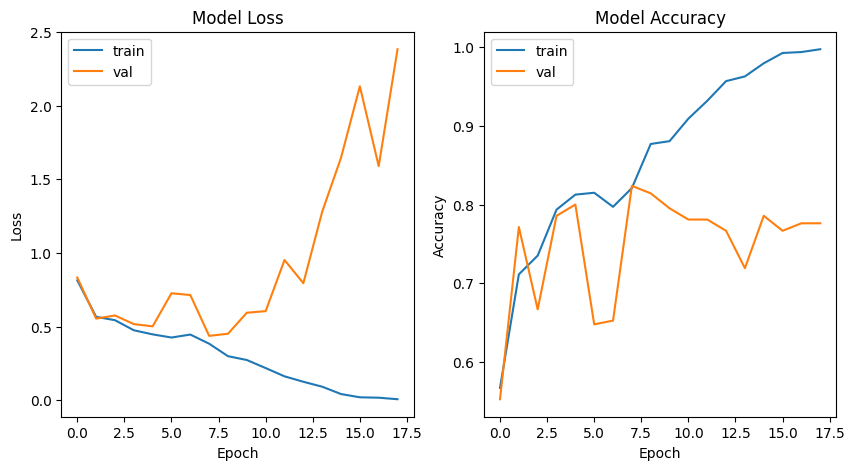

9/9 [==============================] - 17s 766ms/step
[[108  31]
 [ 18 105]]
Specificity:  0.7769784172661871
Sensitivity:  0.8536585365853658
Accuracy:  0.8129770992366412
Precision:  [0.85714286 0.77205882]
Recall:     [0.77697842 0.85365854]
F1score:    [0.81509434 0.81081081]
Iteracion:  2
Epoch 1/300
105/105 [==============================] - 79s 700ms/step - loss: 0.6587 - accuracy: 0.5990 - val_loss: 0.6527 - val_accuracy: 0.5571
Epoch 2/300
105/105 [==============================] - 73s 691ms/step - loss: 0.5957 - accuracy: 0.7029 - val_loss: 0.5147 - val_accuracy: 0.7714
Epoch 3/300
105/105 [==============================] - 73s 695ms/step - loss: 0.5242 - accuracy: 0.7649 - val_loss: 0.5548 - val_accuracy: 0.8048
Epoch 4/300
105/105 [==============================] - 74s 701ms/step - loss: 0.4683 - accuracy: 0.7983 - val_loss: 0.4870 - val_accuracy: 0.7667
Epoch 5/300
105/105 [==============================] - 74s 702ms/step - loss: 0.4913 - accuracy: 0.7721 - val_loss: 0.603

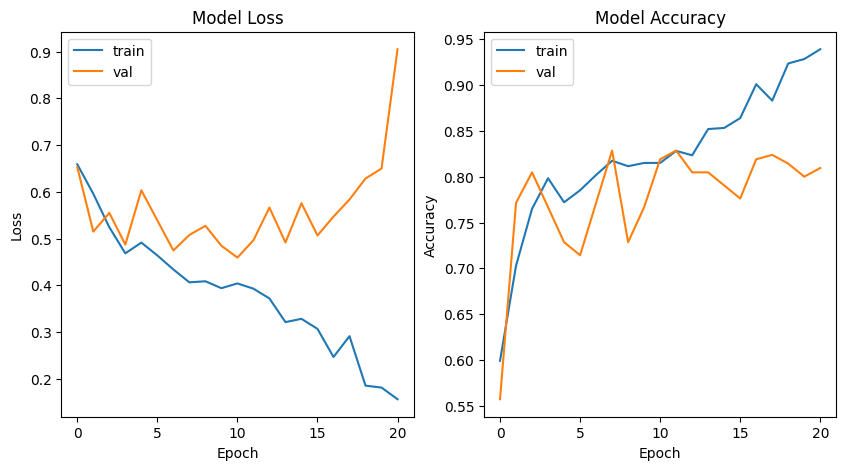

9/9 [==============================] - 7s 862ms/step
[[115  17]
 [ 21 109]]
Specificity:  0.8712121212121212
Sensitivity:  0.8384615384615385
Accuracy:  0.8549618320610687
Precision:  [0.84558824 0.86507937]
Recall:     [0.87121212 0.83846154]
F1score:    [0.85820896 0.8515625 ]
Iteracion:  3
Epoch 1/300
105/105 [==============================] - 77s 686ms/step - loss: 0.7366 - accuracy: 0.5346 - val_loss: 0.5903 - val_accuracy: 0.7810
Epoch 2/300
105/105 [==============================] - 73s 695ms/step - loss: 0.5886 - accuracy: 0.7232 - val_loss: 0.5117 - val_accuracy: 0.8143
Epoch 3/300
105/105 [==============================] - 73s 692ms/step - loss: 0.5750 - accuracy: 0.6838 - val_loss: 0.4889 - val_accuracy: 0.8238
Epoch 4/300
105/105 [==============================] - 73s 700ms/step - loss: 0.5284 - accuracy: 0.7673 - val_loss: 0.6640 - val_accuracy: 0.5143
Epoch 5/300
105/105 [==============================] - 73s 693ms/step - loss: 0.5093 - accuracy: 0.7625 - val_loss: 0.4247

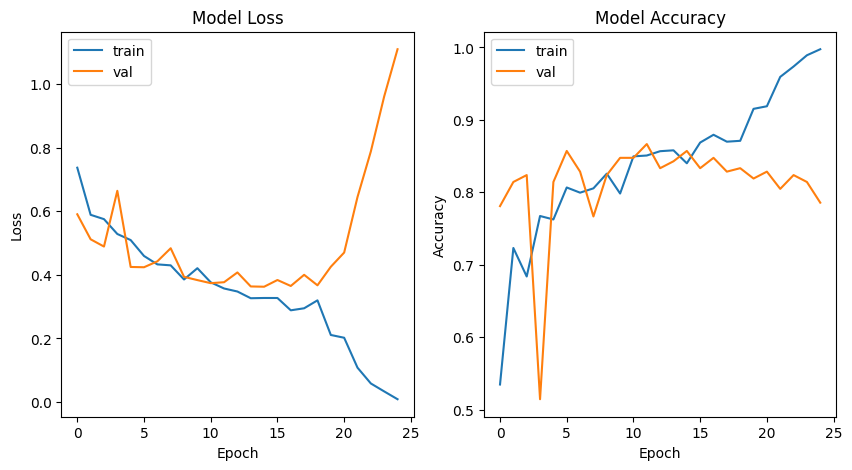

9/9 [==============================] - 7s 859ms/step
[[ 90  29]
 [ 19 124]]
Specificity:  0.7563025210084033
Sensitivity:  0.8671328671328671
Accuracy:  0.816793893129771
Precision:  [0.82568807 0.81045752]
Recall:     [0.75630252 0.86713287]
F1score:    [0.78947368 0.83783784]
Iteracion:  4
Epoch 1/300
105/105 [==============================] - 79s 702ms/step - loss: 0.6702 - accuracy: 0.6122 - val_loss: 0.6670 - val_accuracy: 0.5762
Epoch 2/300
105/105 [==============================] - 72s 687ms/step - loss: 0.5834 - accuracy: 0.7029 - val_loss: 0.5145 - val_accuracy: 0.7524
Epoch 3/300
105/105 [==============================] - 73s 699ms/step - loss: 0.5076 - accuracy: 0.7709 - val_loss: 0.8699 - val_accuracy: 0.4524
Epoch 4/300
105/105 [==============================] - 72s 687ms/step - loss: 0.5056 - accuracy: 0.7840 - val_loss: 0.5078 - val_accuracy: 0.8238
Epoch 5/300
105/105 [==============================] - 72s 688ms/step - loss: 0.4675 - accuracy: 0.7912 - val_loss: 0.4445 

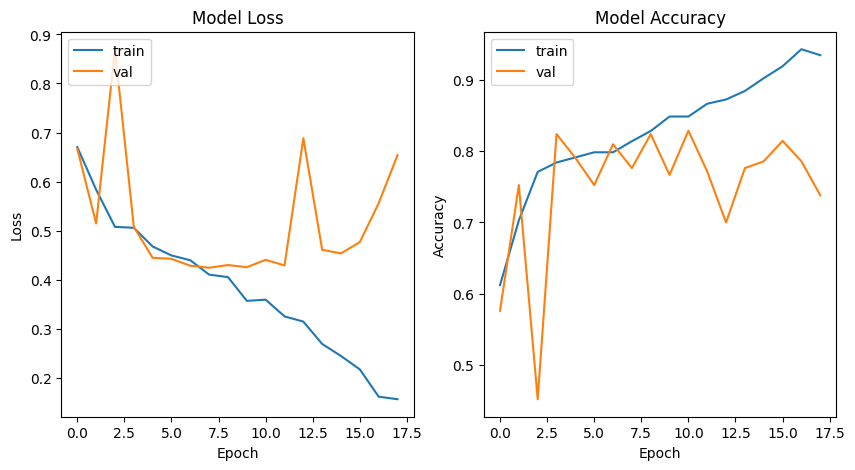

9/9 [==============================] - 7s 860ms/step
[[ 96  11]
 [ 54 101]]
Specificity:  0.897196261682243
Sensitivity:  0.6516129032258065
Accuracy:  0.7519083969465649
Precision:  [0.64       0.90178571]
Recall:     [0.89719626 0.6516129 ]
F1score:    [0.74708171 0.75655431]
Iteracion:  5
Epoch 1/300
105/105 [==============================] - 79s 699ms/step - loss: 0.7656 - accuracy: 0.6193 - val_loss: 0.9250 - val_accuracy: 0.5429
Epoch 2/300
105/105 [==============================] - 72s 689ms/step - loss: 0.6084 - accuracy: 0.6885 - val_loss: 0.4952 - val_accuracy: 0.7667
Epoch 3/300
105/105 [==============================] - 72s 690ms/step - loss: 0.4986 - accuracy: 0.7673 - val_loss: 0.4883 - val_accuracy: 0.7571
Epoch 4/300
105/105 [==============================] - 72s 686ms/step - loss: 0.4517 - accuracy: 0.7959 - val_loss: 0.4784 - val_accuracy: 0.8095
Epoch 5/300
105/105 [==============================] - 72s 687ms/step - loss: 0.4755 - accuracy: 0.7840 - val_loss: 0.5431 

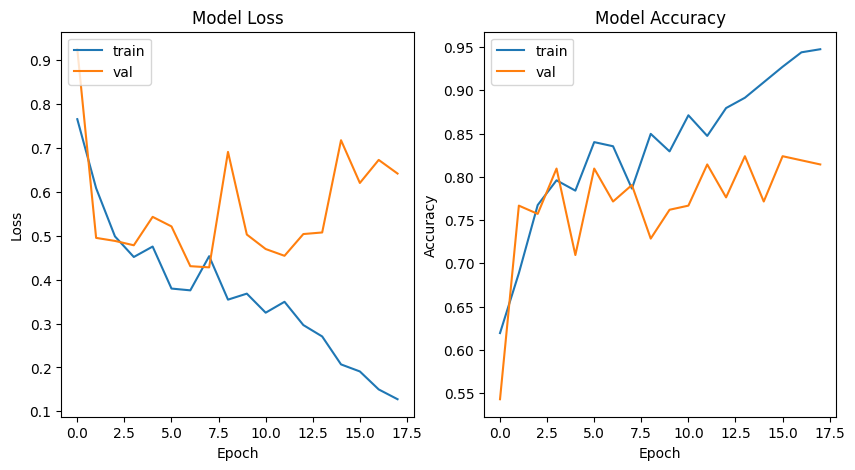

9/9 [==============================] - 7s 867ms/step
[[105  21]
 [ 32 104]]
Specificity:  0.8333333333333334
Sensitivity:  0.7647058823529411
Accuracy:  0.7977099236641222
Precision:  [0.76642336 0.832     ]
Recall:     [0.83333333 0.76470588]
F1score:    [0.79847909 0.79693487]
Media
Specificity:  0.8270045309004577  |  Sensitivity:  0.7951143455517038
Accuracy:  0.8068702290076336  |  Precision:  0.8116223942730066  |  Recall:  0.8110594382260807  |  F1score:  0.8062038100236913

Desviacion
Specificity:  0.05370778360659838  |  Sensitivity:  0.080013008281664
Accuracy:  0.033326534279302406  |  Precision:  0.06920244594009607  |  Recall:  0.06998249593649745  |  F1score:  0.034998429896536384


In [30]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


  image_in=Input((x_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(2, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=10,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(x_train, to_categorical(y_train, 2), epochs=300,  batch_size=8, verbose=1,
                      validation_data=(x_val, to_categorical(y_val, 2)), callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(x_test)
  pred = model.predict(x_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

**RandomForest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  #split_data1, split_data = features_data[:data1.shape[0]], features_data[data1.shape[0]:]
  #x_train, x_test, y_train, y_test = train_test_split(split_data1, data1['DIAGN'], test_size=0.5)
  #x_train = pd.concat([x_train, split_data])
  #y_train = pd.concat([y_train, data2['DIAGN'],data3['DIAGN']])

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[105  30]
 [ 17 110]]
Specificity:  0.7777777777777778
Sensitivity:  0.8661417322834646
Accuracy:  0.8206106870229007
Precision:  [0.86065574 0.78571429]
Recall:     [0.77777778 0.86614173]
F1score:    [0.81712062 0.82397004]
Iteracion:  2
[[ 91  30]
 [ 19 122]]
Specificity:  0.7520661157024794
Sensitivity:  0.8652482269503546
Accuracy:  0.8129770992366412
Precision:  [0.82727273 0.80263158]
Recall:     [0.75206612 0.86524823]
F1score:    [0.78787879 0.83276451]
Iteracion:  3
[[104  30]
 [ 18 110]]
Specificity:  0.7761194029850746
Sensitivity:  0.859375
Accuracy:  0.816793893129771
Precision:  [0.85245902 0.78571429]
Recall:     [0.7761194 0.859375 ]
F1score:    [0.8125     0.82089552]
Iteracion:  4
[[112  25]
 [ 12 113]]
Specificity:  0.8175182481751825
Sensitivity:  0.904
Accuracy:  0.8587786259541985
Precision:  [0.90322581 0.81884058]
Recall:     [0.81751825 0.904     ]
F1score:    [0.85823755 0.85931559]
Iteracion:  5
[[107  30]
 [ 11 114]]
Specificity:  0.781021897

**LogisticRegression**

In [32]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[104  18]
 [ 28 112]]
Specificity:  0.8524590163934426
Sensitivity:  0.8
Accuracy:  0.8244274809160306
Precision:  [0.78787879 0.86153846]
Recall:     [0.85245902 0.8       ]
F1score:    [0.81889764 0.82962963]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[110  18]
 [ 20 114]]
Specificity:  0.859375
Sensitivity:  0.8507462686567164
Accuracy:  0.8549618320610687
Precision:  [0.84615385 0.86363636]
Recall:     [0.859375   0.85074627]
F1score:    [0.85271318 0.85714286]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[112  23]
 [ 23 104]]
Specificity:  0.8296296296296296
Sensitivity:  0.8188976377952756
Accuracy:  0.8244274809160306
Precision:  [0.82962963 0.81889764]
Recall:     [0.82962963 0.81889764]
F1score:    [0.82962963 0.81889764]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[100  21]
 [ 29 112]]
Specificity:  0.8264462809917356
Sensitivity:  0.7943262411347518
Accuracy:  0.8091603053435115
Precision:  [0.7751938  0.84210526]
Recall:     [0.82644628 0.79432624]
F1score:    [0.8        0.81751825]
Iteracion:  5
[[100  27]
 [ 27 108]]
Specificity:  0.7874015748031497
Sensitivity:  0.8
Accuracy:  0.7938931297709924
Precision:  [0.78740157 0.8       ]
Recall:     [0.78740157 0.8       ]
F1score:    [0.78740157 0.8       ]
Media
Specificity:  0.8310623003635914  |  Sensitivity:  0.8127940295173488
Accuracy:  0.8213740458015266  |  Precision:  0.8212435363043022  |  Recall:  0.8219281649404702  |  F1score:  0.8211830393265573

Desviacion
Specificity:  0.025254890830494963  |  Sensitivity:  0.02071743265961346
Accuracy:  0.020254197193010075  |  Precision:  0.030631272877508074  |  Recall:  0.024838341195837502  |  F1score:  0.021195410838878694


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [33]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[113  30]
 [ 16 103]]
Specificity:  0.7902097902097902
Sensitivity:  0.865546218487395
Accuracy:  0.8244274809160306
Precision:  [0.87596899 0.77443609]
Recall:     [0.79020979 0.86554622]
F1score:    [0.83088235 0.81746032]
Iteracion:  2
[[115  21]
 [ 18 108]]
Specificity:  0.8455882352941176
Sensitivity:  0.8571428571428571
Accuracy:  0.851145038167939
Precision:  [0.86466165 0.8372093 ]
Recall:     [0.84558824 0.85714286]
F1score:    [0.85501859 0.84705882]
Iteracion:  3
[[110  25]
 [ 22 105]]
Specificity:  0.8148148148148148
Sensitivity:  0.8267716535433071
Accuracy:  0.8206106870229007
Precision:  [0.83333333 0.80769231]
Recall:     [0.81481481 0.82677165]
F1score:    [0.82397004 0.81712062]
Iteracion:  4
[[ 95  30]
 [ 20 117]]
Specificity:  0.76
Sensitivity:  0.8540145985401459
Accuracy:  0.8091603053435115
Precision:  [0.82608696 0.79591837]
Recall:     [0.76      0.8540146]
F1score:    [0.79166667 0.82394366]
Iteracion:  5
[[113  30]
 [ 20  99]]
Specificity:  0.7

**SVC**

In [34]:
#SVC
from sklearn.svm import SVC

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  SVM = SVC(
      C= 1,
      class_weight= None,
      degree= 2,
      gamma= 'scale',
      kernel= 'rbf')
  """
  parameter_space = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
  }

  SVM = GridSearchCV(SVM, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  SVM.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(SVM.best_params_)

  pred = SVM.predict(x_test)
  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[115  11]
 [ 58  78]]
Specificity:  0.9126984126984127
Sensitivity:  0.5735294117647058
Accuracy:  0.7366412213740458
Precision:  [0.66473988 0.87640449]
Recall:     [0.91269841 0.57352941]
F1score:    [0.76923077 0.69333333]
Iteracion:  2
[[123  12]
 [ 40  87]]
Specificity:  0.9111111111111111
Sensitivity:  0.6850393700787402
Accuracy:  0.8015267175572519
Precision:  [0.75460123 0.87878788]
Recall:     [0.91111111 0.68503937]
F1score:    [0.82550336 0.7699115 ]
Iteracion:  3
[[113  29]
 [ 44  76]]
Specificity:  0.795774647887324
Sensitivity:  0.6333333333333333
Accuracy:  0.7213740458015268
Precision:  [0.71974522 0.72380952]
Recall:     [0.79577465 0.63333333]
F1score:    [0.75585284 0.67555556]
Iteracion:  4
[[121  12]
 [ 56  73]]
Specificity:  0.9097744360902256
Sensitivity:  0.5658914728682171
Accuracy:  0.7404580152671756
Precision:  [0.68361582 0.85882353]
Recall:     [0.90977444 0.56589147]
F1score:    [0.78064516 0.68224299]
Iteracion:  5
[[110  13]
 [ 57  82]]


# **PCA**

In [19]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 100352)


**PCA**

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(features_data)
modelo_pca = pca_pipe.named_steps['pca']

In [22]:
cnt=1
sum=0
for i in modelo_pca.explained_variance_ratio_ :
  if(cnt<1000):
    sum+=i
  cnt+=1
print(sum*100)

99.86585796496001


In [23]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=1000))
pca_pipe.fit(features_data)
modelo_pca = pca_pipe.named_steps['pca']
features_data = pca_pipe.transform(features_data)
features_data.shape

(1310, 1000)

**UNET 1D**

Iteracion:  1
Epoch 1/300
27/27 [==============================] - 12s 83ms/step - loss: 0.6799 - accuracy: 0.4857 - val_loss: 0.6440 - val_accuracy: 0.5667
Epoch 2/300
27/27 [==============================] - 1s 31ms/step - loss: 0.6245 - accuracy: 0.7088 - val_loss: 0.6082 - val_accuracy: 0.7286
Epoch 3/300
27/27 [==============================] - 1s 32ms/step - loss: 0.5807 - accuracy: 0.7446 - val_loss: 0.5742 - val_accuracy: 0.7524
Epoch 4/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5337 - accuracy: 0.7649 - val_loss: 0.5500 - val_accuracy: 0.7286
Epoch 5/300
27/27 [==============================] - 1s 31ms/step - loss: 0.4917 - accuracy: 0.7637 - val_loss: 0.5212 - val_accuracy: 0.7905
Epoch 6/300
27/27 [==============================] - 1s 31ms/step - loss: 0.4581 - accuracy: 0.7888 - val_loss: 0.5058 - val_accuracy: 0.7857
Epoch 7/300
27/27 [==============================] - 1s 31ms/step - loss: 0.4253 - accuracy: 0.8210 - val_loss: 0.4906 - val_accuracy

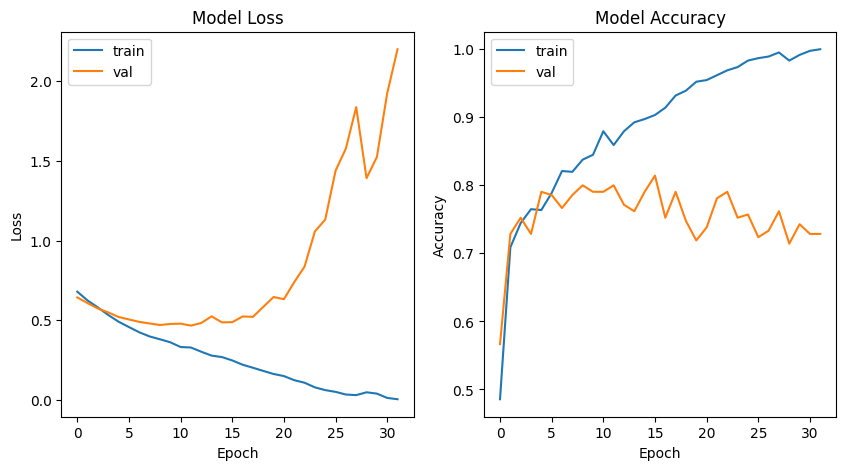

9/9 [==============================] - 0s 9ms/step
[[103  24]
 [ 21 114]]
Specificity:  0.8110236220472441
Sensitivity:  0.8444444444444444
Accuracy:  0.8282442748091603
Precision:  [0.83064516 0.82608696]
Recall:     [0.81102362 0.84444444]
F1score:    [0.82071713 0.83516484]
Iteracion:  2
Epoch 1/300
27/27 [==============================] - 7s 50ms/step - loss: 0.6453 - accuracy: 0.6539 - val_loss: 0.6627 - val_accuracy: 0.7000
Epoch 2/300
27/27 [==============================] - 1s 30ms/step - loss: 0.5721 - accuracy: 0.7649 - val_loss: 0.6073 - val_accuracy: 0.7095
Epoch 3/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5277 - accuracy: 0.7876 - val_loss: 0.5819 - val_accuracy: 0.7000
Epoch 4/300
27/27 [==============================] - 1s 30ms/step - loss: 0.4958 - accuracy: 0.7840 - val_loss: 0.5928 - val_accuracy: 0.7524
Epoch 5/300
27/27 [==============================] - 1s 30ms/step - loss: 0.4616 - accuracy: 0.8067 - val_loss: 0.5757 - val_accuracy: 0.757

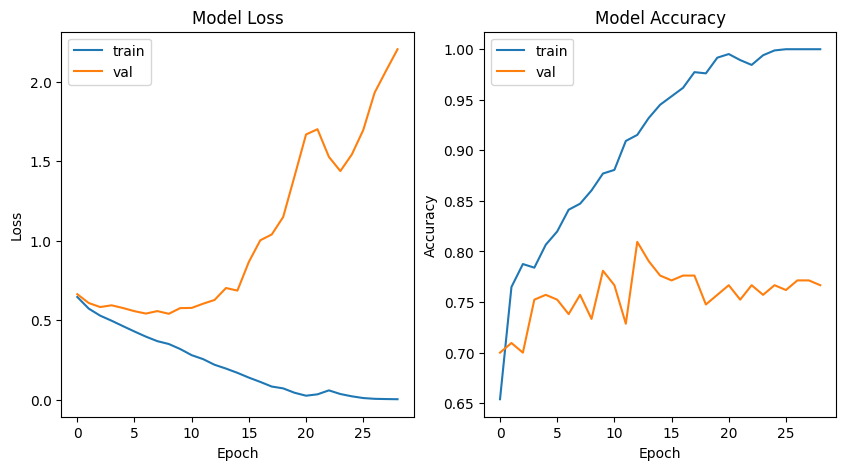

9/9 [==============================] - 0s 9ms/step
[[106  16]
 [ 50  90]]
Specificity:  0.8688524590163934
Sensitivity:  0.6428571428571429
Accuracy:  0.7480916030534351
Precision:  [0.67948718 0.8490566 ]
Recall:     [0.86885246 0.64285714]
F1score:    [0.76258993 0.73170732]
Iteracion:  3
Epoch 1/300
27/27 [==============================] - 7s 51ms/step - loss: 0.6651 - accuracy: 0.5084 - val_loss: 0.6471 - val_accuracy: 0.5762
Epoch 2/300
27/27 [==============================] - 1s 30ms/step - loss: 0.6095 - accuracy: 0.7243 - val_loss: 0.6120 - val_accuracy: 0.7190
Epoch 3/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5609 - accuracy: 0.7518 - val_loss: 0.5872 - val_accuracy: 0.7286
Epoch 4/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5164 - accuracy: 0.7589 - val_loss: 0.5764 - val_accuracy: 0.7190
Epoch 5/300
27/27 [==============================] - 1s 31ms/step - loss: 0.4824 - accuracy: 0.7721 - val_loss: 0.5678 - val_accuracy: 0.738

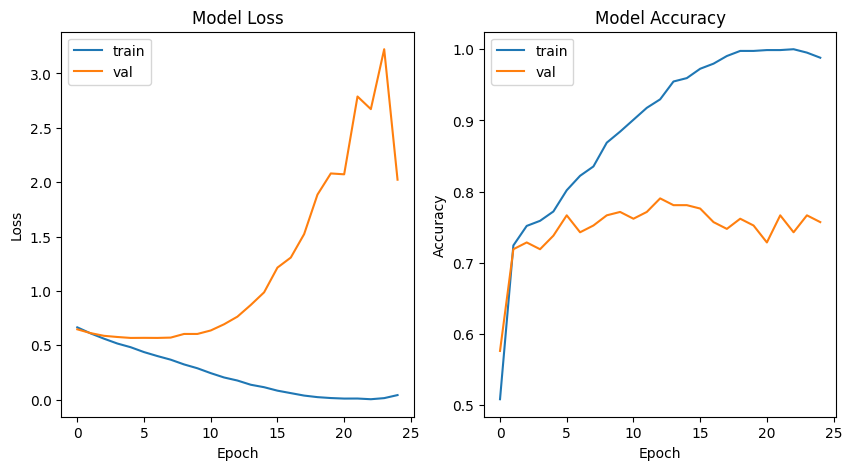

9/9 [==============================] - 0s 9ms/step
[[100  31]
 [ 36  95]]
Specificity:  0.7633587786259542
Sensitivity:  0.7251908396946565
Accuracy:  0.7442748091603053
Precision:  [0.73529412 0.75396825]
Recall:     [0.76335878 0.72519084]
F1score:    [0.74906367 0.73929961]
Iteracion:  4
Epoch 1/300
27/27 [==============================] - 8s 51ms/step - loss: 0.6572 - accuracy: 0.6122 - val_loss: 0.6112 - val_accuracy: 0.7000
Epoch 2/300
27/27 [==============================] - 1s 30ms/step - loss: 0.5942 - accuracy: 0.7399 - val_loss: 0.5761 - val_accuracy: 0.7476
Epoch 3/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5474 - accuracy: 0.7589 - val_loss: 0.5550 - val_accuracy: 0.7143
Epoch 4/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5091 - accuracy: 0.7780 - val_loss: 0.5485 - val_accuracy: 0.7048
Epoch 5/300
27/27 [==============================] - 1s 31ms/step - loss: 0.4768 - accuracy: 0.7840 - val_loss: 0.5132 - val_accuracy: 0.742

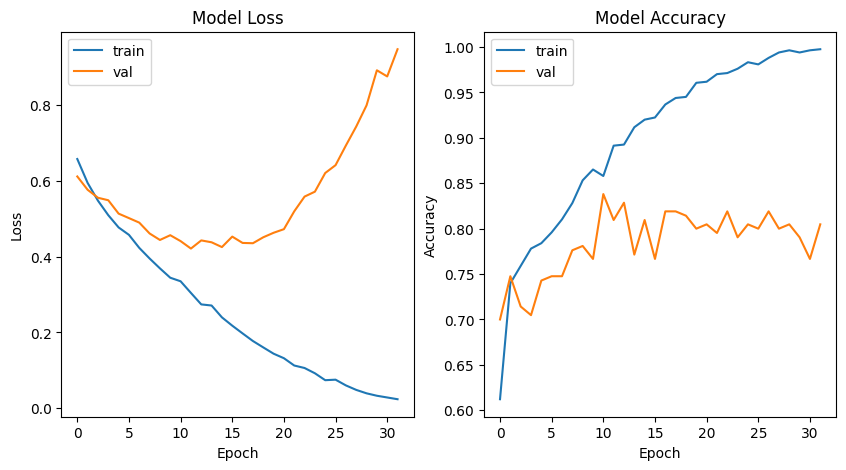

9/9 [==============================] - 0s 9ms/step
[[101  22]
 [ 31 108]]
Specificity:  0.8211382113821138
Sensitivity:  0.7769784172661871
Accuracy:  0.7977099236641222
Precision:  [0.76515152 0.83076923]
Recall:     [0.82113821 0.77697842]
F1score:    [0.79215686 0.80297398]
Iteracion:  5
Epoch 1/300
27/27 [==============================] - 7s 51ms/step - loss: 0.6776 - accuracy: 0.5597 - val_loss: 0.6519 - val_accuracy: 0.6667
Epoch 2/300
27/27 [==============================] - 1s 31ms/step - loss: 0.6151 - accuracy: 0.7232 - val_loss: 0.6241 - val_accuracy: 0.6905
Epoch 3/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5784 - accuracy: 0.7458 - val_loss: 0.6005 - val_accuracy: 0.6952
Epoch 4/300
27/27 [==============================] - 1s 31ms/step - loss: 0.5399 - accuracy: 0.7661 - val_loss: 0.5897 - val_accuracy: 0.7333
Epoch 5/300
27/27 [==============================] - 1s 30ms/step - loss: 0.5064 - accuracy: 0.7757 - val_loss: 0.5711 - val_accuracy: 0.733

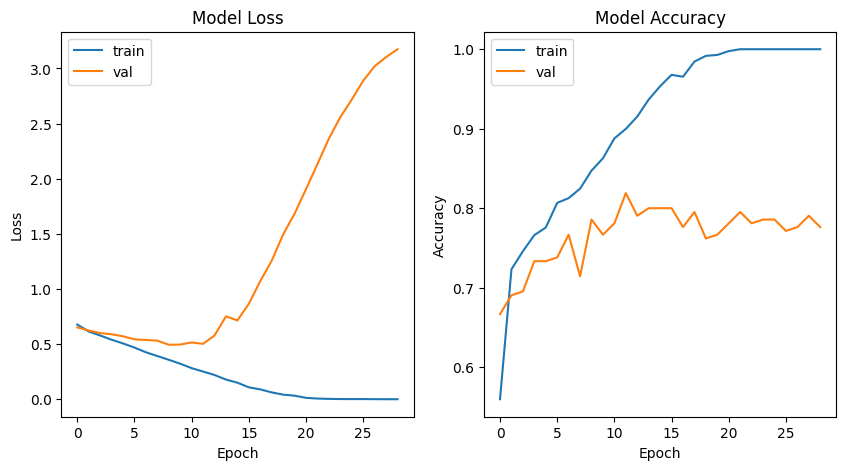

9/9 [==============================] - 0s 9ms/step
[[100  25]
 [ 29 108]]
Specificity:  0.8
Sensitivity:  0.7883211678832117
Accuracy:  0.7938931297709924
Precision:  [0.7751938  0.81203008]
Recall:     [0.8        0.78832117]
F1score:    [0.78740157 0.8       ]
Media
Specificity:  0.8128746142143412  |  Sensitivity:  0.7555584024291285
Accuracy:  0.7824427480916031  |  Precision:  0.7857682892246467  |  Recall:  0.784216508321735  |  F1score:  0.7821074908320005

Desviacion
Specificity:  0.03412566771220983  |  Sensitivity:  0.06790685838192158
Accuracy:  0.03193358879901052  |  Precision:  0.050745576391892006  |  Recall:  0.060903516642350726  |  F1score:  0.0332202903685005


In [24]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


  image_in=Input((x_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(2, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=20,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(x_train, to_categorical(y_train, 2), epochs=300,  batch_size=32, verbose=1,
                      validation_data=(x_val, to_categorical(y_val, 2)), callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  pred = model.predict(x_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

**RandomForest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[ 86  41]
 [ 24 111]]
Specificity:  0.6771653543307087
Sensitivity:  0.8222222222222222
Accuracy:  0.7519083969465649
Precision:  [0.78181818 0.73026316]
Recall:     [0.67716535 0.82222222]
F1score:    [0.7257384  0.77351916]
Iteracion:  2
[[104  28]
 [ 25 105]]
Specificity:  0.7878787878787878
Sensitivity:  0.8076923076923077
Accuracy:  0.7977099236641222
Precision:  [0.80620155 0.78947368]
Recall:     [0.78787879 0.80769231]
F1score:    [0.79693487 0.79847909]
Iteracion:  3
[[106  29]
 [ 22 105]]
Specificity:  0.7851851851851852
Sensitivity:  0.8267716535433071
Accuracy:  0.8053435114503816
Precision:  [0.828125   0.78358209]
Recall:     [0.78518519 0.82677165]
F1score:    [0.80608365 0.8045977 ]
Iteracion:  4
[[101  41]
 [ 18 102]]
Specificity:  0.7112676056338029
Sensitivity:  0.85
Accuracy:  0.7748091603053435
Precision:  [0.8487395  0.71328671]
Recall:     [0.71126761 0.85      ]
F1score:    [0.77394636 0.7756654 ]
Iteracion:  5
[[ 98  31]
 [ 21 112]]
Specificity: 

**LogisticRegression**

In [26]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[109  22]
 [ 28 103]]
Specificity:  0.8320610687022901
Sensitivity:  0.7862595419847328
Accuracy:  0.8091603053435115
Precision:  [0.79562044 0.824     ]
Recall:     [0.83206107 0.78625954]
F1score:    [0.81343284 0.8046875 ]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[109  24]
 [ 27 102]]
Specificity:  0.8195488721804511
Sensitivity:  0.7906976744186046
Accuracy:  0.8053435114503816
Precision:  [0.80147059 0.80952381]
Recall:     [0.81954887 0.79069767]
F1score:    [0.81040892 0.8       ]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[106  17]
 [ 26 113]]
Specificity:  0.8617886178861789
Sensitivity:  0.8129496402877698
Accuracy:  0.8358778625954199
Precision:  [0.8030303  0.86923077]
Recall:     [0.86178862 0.81294964]
F1score:    [0.83137255 0.8401487 ]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[107  24]
 [ 23 108]]
Specificity:  0.816793893129771
Sensitivity:  0.8244274809160306
Accuracy:  0.8206106870229007
Precision:  [0.82307692 0.81818182]
Recall:     [0.81679389 0.82442748]
F1score:    [0.81992337 0.82129278]
Iteracion:  5
[[112  21]
 [ 23 106]]
Specificity:  0.8421052631578947
Sensitivity:  0.8217054263565892
Accuracy:  0.8320610687022901
Precision:  [0.82962963 0.83464567]
Recall:     [0.84210526 0.82170543]
F1score:    [0.8358209 0.828125 ]
Media
Specificity:  0.8344595430113172  |  Sensitivity:  0.8072079527927454
Accuracy:  0.8206106870229007  |  Precision:  0.820840994815609  |  Recall:  0.8208337479020313  |  F1score:  0.8205212548493643

Desviacion
Specificity:  0.016404214942815475  |  Sensitivity:  0.01581822411768374
Accuracy:  0.012069762061711392  |  Precision:  0.020218847347771525  |  Recall:  0.021102595419140276  |  F1score:  0.012728591645657093


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [27]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[ 99  26]
 [ 24 113]]
Specificity:  0.792
Sensitivity:  0.8248175182481752
Accuracy:  0.8091603053435115
Precision:  [0.80487805 0.81294964]
Recall:     [0.792      0.82481752]
F1score:    [0.7983871  0.81884058]
Iteracion:  2
[[ 89  32]
 [ 27 114]]
Specificity:  0.7355371900826446
Sensitivity:  0.8085106382978723
Accuracy:  0.7748091603053435
Precision:  [0.76724138 0.78082192]
Recall:     [0.73553719 0.80851064]
F1score:    [0.75105485 0.79442509]
Iteracion:  3
[[ 98  22]
 [ 14 128]]
Specificity:  0.8166666666666667
Sensitivity:  0.9014084507042254
Accuracy:  0.8625954198473282
Precision:  [0.875      0.85333333]
Recall:     [0.81666667 0.90140845]
F1score:    [0.84482759 0.87671233]
Iteracion:  4
[[102  38]
 [ 11 111]]
Specificity:  0.7285714285714285
Sensitivity:  0.9098360655737705
Accuracy:  0.8129770992366412
Precision:  [0.90265487 0.74496644]
Recall:     [0.72857143 0.90983607]
F1score:    [0.80632411 0.81918819]
Iteracion:  5
[[ 91  42]
 [ 16 113]]
Specificity:

**SVC**

In [28]:
#SVC
from sklearn.svm import SVC

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  SVM = SVC(
      C= 1,
      class_weight= None,
      degree= 2,
      gamma= 'scale',
      kernel= 'rbf')
  """
  parameter_space = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
  }

  SVM = GridSearchCV(SVM, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  SVM.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(SVM.best_params_)

  pred = SVM.predict(x_test)
  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[108  33]
 [  8 113]]
Specificity:  0.7659574468085106
Sensitivity:  0.9338842975206612
Accuracy:  0.8435114503816794
Precision:  [0.93103448 0.7739726 ]
Recall:     [0.76595745 0.9338843 ]
F1score:    [0.84046693 0.84644195]
Iteracion:  2
[[100  30]
 [ 17 115]]
Specificity:  0.7692307692307693
Sensitivity:  0.8712121212121212
Accuracy:  0.8206106870229007
Precision:  [0.85470085 0.79310345]
Recall:     [0.76923077 0.87121212]
F1score:    [0.8097166  0.83032491]
Iteracion:  3
[[116  23]
 [ 15 108]]
Specificity:  0.8345323741007195
Sensitivity:  0.8780487804878049
Accuracy:  0.8549618320610687
Precision:  [0.88549618 0.82442748]
Recall:     [0.83453237 0.87804878]
F1score:    [0.85925926 0.8503937 ]
Iteracion:  4
[[102  29]
 [ 17 114]]
Specificity:  0.7786259541984732
Sensitivity:  0.8702290076335878
Accuracy:  0.8244274809160306
Precision:  [0.85714286 0.7972028 ]
Recall:     [0.77862595 0.87022901]
F1score:    [0.816      0.83211679]
Iteracion:  5
[[106  36]
 [ 17 103]]